In [30]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
#Loading the dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
# a) Data Preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   KMeans_Cluster          200 non-null    int32 
 6   Hierarchical_Cluster    200 non-null    int32 
dtypes: int32(2), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
#Normalizing the data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

print(data.isnull().sum())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [32]:

# b) Train-Test Split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


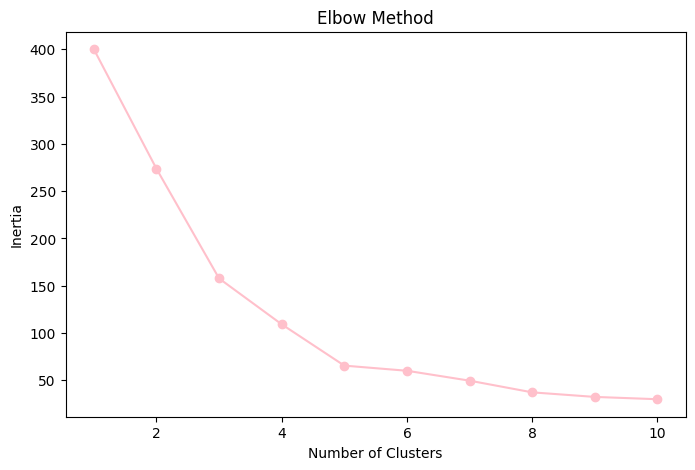

In [ ]:
# c) K-Means Clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='pink')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with optimal clusters 
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['KMeans_Cluster'] = kmeans_labels

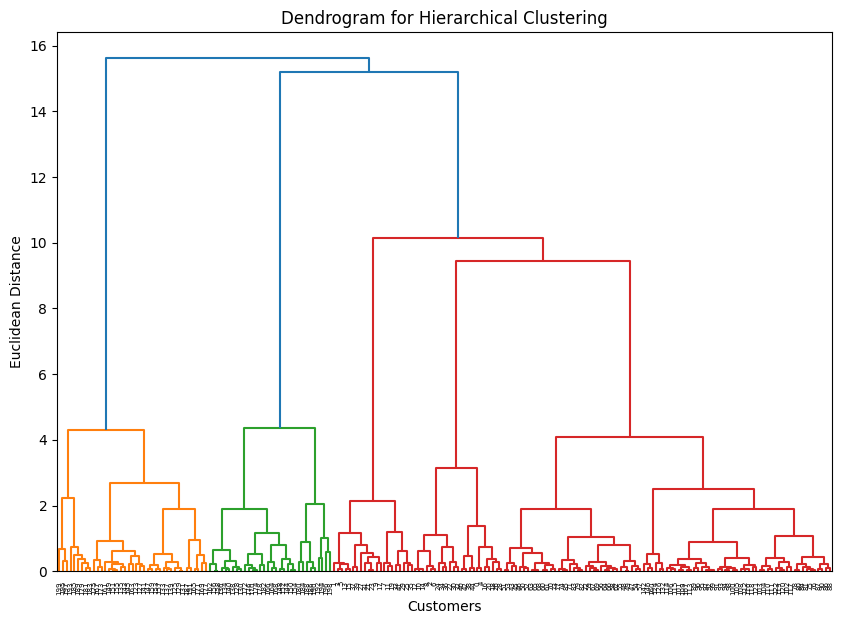

In [21]:
# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# Cut dendrogram to form clusters (e.g., 5 clusters)
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Add cluster labels to the original dataset
data['Hierarchical_Cluster'] = hierarchical_labels

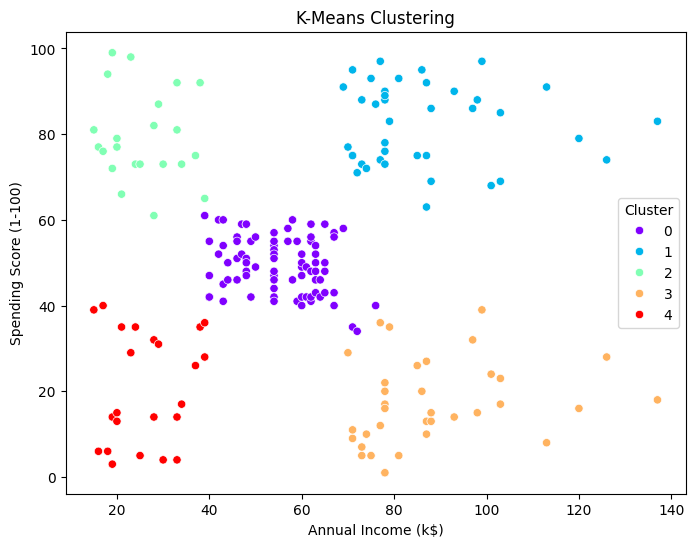

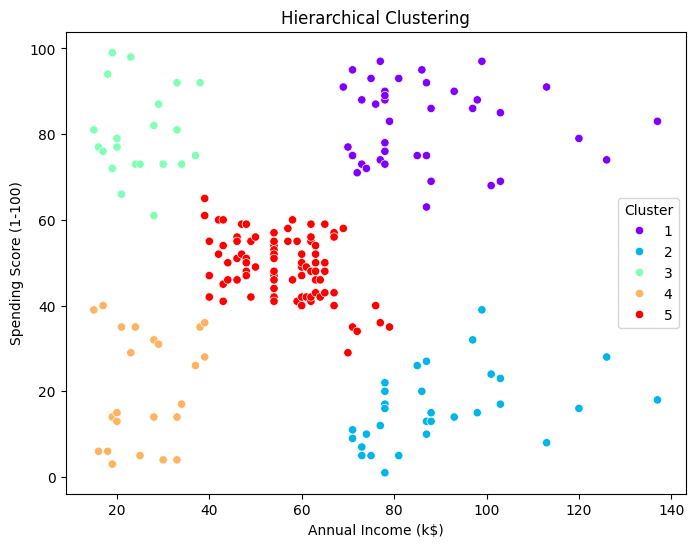

In [26]:
# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hierarchical_labels, palette='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# e) Evaluate Clustering Performance
from sklearn.metrics import silhouette_score

# Evaluate K-Means clustering using Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Evaluate Hierarchical clustering using Silhouette Score
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.4f}")

K-Means Silhouette Score: 0.5547
Hierarchical Silhouette Score: 0.5538
